
# generate seudo data

In [1]:
# import packages

import numpy as np
import pandas as pd

from fixedeffect.iv import iv2sls, ivgmm,ivtest
from fixedeffect.fe import fixedeffect, did,getfe
from fixedeffect.utils.panel_dgp import gen_data 

N = 100
T = 10
beta = [-3,1,2,3,4]
ate = 1
exp_date = 5
df = gen_data(N, T, beta, ate, exp_date)

# iv
## iv2sls

In [2]:
formula = 'y ~ x_1|id+time|0|(x_2~x_3+x_4)'

model_iv2sls = iv2sls(data_df = df,
                      formula = formula)
result = model_iv2sls.fit()
result.summary()



dependent variable(s): ['y']
independent(exogenous): ['x_1']
category variables(fixed effects): ['id', 'time']
cluster variables: ['0']
endogenous variables: ['x_2']
instruments: ['x_3', 'x_4']
            High Dimensional Fixed Effect Regression Results           
  Dep. Variable:               y   R-squared:               -286.9643  
  No. Observations:         1000   Adj. R-squared:          -287.5419  
  DoF of residual:         889.0   F-statistic:              985.4441  
  Residual std err:      94.1909   Prob (F-statistic):     2.752e-226  
  Covariance Type:     nonrobust   DoF of F-test:        [2.0, 889.0]  
  Cluster Method:     no_cluster                                       
                   coef nonrobust std err          t      P>|t|     [0.025     0.975]   
----------------------------------------------------------------------------------------
  const        -1.40442           0.10207   -13.7587     0.0000    -1.6048    -1.2041   
  x_1          -1.52247           0

/Users/zhouxiaoyu/desktop/FixedEffectModel/fixedeffect/iv/iv.py:46: UserWarning: "iv2sls" will no longer be supported beyond version 0.0.5, please use "ivgmm" instead
  warnings.warn('"iv2sls" will no longer be supported beyond version 0.0.5, please use "ivgmm" instead')


In [3]:
exog_x = ['x_1']
endog_x = ['x_2']
iv = ['x_3','x_4']
y = ['y']

model_iv2sls = iv2sls(data_df = df,
                      dependent = y,
                      exog_x = exog_x,
                      endog_x = endog_x,
                      category = ['id','time'],
                      iv = iv)

result = model_iv2sls.fit()
result.summary()

            High Dimensional Fixed Effect Regression Results           
  Dep. Variable:               y   R-squared:               -286.9643  
  No. Observations:         1000   Adj. R-squared:          -287.5419  
  DoF of residual:         889.0   F-statistic:              985.4441  
  Residual std err:      94.1909   Prob (F-statistic):     2.752e-226  
  Covariance Type:     nonrobust   DoF of F-test:        [2.0, 889.0]  
  Cluster Method:     no_cluster                                       
                   coef nonrobust std err          t      P>|t|     [0.025     0.975]   
----------------------------------------------------------------------------------------
  const        -1.40442           0.10207   -13.7587     0.0000    -1.6048    -1.2041   
  x_1          -1.52247           0.12027   -12.6589     0.0000    -1.7585    -1.2864   
  hat_x_2      97.95844           2.25688    43.4043     0.0000    93.5290   102.3879   
             First-Stage F-stat      P > F   
-----

## ivgmm
### one-step 
#### non-robust standard error

In [5]:
exog_x = ['x_1']
endog_x = ['x_2']
iv = ['x_3','x_4']
y = ['y']

model_ivgmm = ivgmm(data_df = df,
                      dependent = y,
                      exog_x = exog_x,
                      endog_x = endog_x,
                      category = ['id','time'],
                      iv = iv)

result = model_ivgmm.fit()
result.summary()

           High Dimensional Fixed Effect Regression Results          
  Dep. Variable:               y   R-squared:             -286.9643  
  No. Observations:         1000   Adj. R-squared:        -286.6763  
  DoF of residual:           889   F-statistic:              1.0638  
  Residual std err:     100.5005   Prob (F-statistic):       0.3456  
  Covariance Type:     nonrobust   DoF of F-test:          [2, 889]  
  Cluster Method:     no_cluster                                     
                   coef nonrobust std err          t      P>|t|     [0.025     0.975]   
----------------------------------------------------------------------------------------
  const        -1.40442           3.10678    -0.4520     0.6513    -7.5019     4.6931   
  x_1          -1.52247           3.66055    -0.4159     0.6776    -8.7068     5.6619   
  x_2          97.95844          68.69139     1.4261     0.1542   -36.8578   232.7746   
             First-Stage F-stat      P > F   
-------------------

#### robust standard error

In [7]:
model_ivgmm = ivgmm(data_df = df,
                    dependent = y,
                    exog_x = exog_x,
                    endog_x = endog_x,
                    category = ['id','time'],
                    robust=True,
                    iv = iv)

result = model_ivgmm.fit()
result.summary()

                 High Dimensional Fixed Effect Regression Results                
  Dep. Variable:                           y   R-squared:             -286.9643  
  No. Observations:                     1000   Adj. R-squared:        -286.6763  
  DoF of residual:                       889   F-statistic:              1.2703  
  Residual std err:                 100.5005   Prob (F-statistic):       0.2813  
  Covariance Type:    Heteroskedastic-Robust   DoF of F-test:          [2, 889]  
  Cluster Method:                 no_cluster                                     
                   coef    std err          t      P>|t|     [0.025     0.975]   
---------------------------------------------------------------------------------
  const        -1.40442    2.94966    -0.4761     0.6341    -7.1935     4.3847   
  x_1          -1.52247    3.52664    -0.4317     0.6661    -8.4440     5.3990   
  x_2          97.95844   62.24064     1.5739     0.1159   -24.1973   220.1142   
             Fir

#### clustered standard error

In [8]:
model_ivgmm = ivgmm(data_df = df,
                    dependent = y,
                    exog_x = exog_x,
                    endog_x = endog_x,
                    category = ['id','time'],
                    cluster=['id'],
                    iv = iv)

result = model_ivgmm.fit()
result.summary()

           High Dimensional Fixed Effect Regression Results          
  Dep. Variable:               y   R-squared:             -286.9643  
  No. Observations:         1000   Adj. R-squared:        -286.6763  
  DoF of residual:           889   F-statistic:              1.0632  
  Residual std err:     100.5005   Prob (F-statistic):       0.3458  
  Covariance Type:     clustered   DoF of F-test:          [2, 889]  
  Cluster Method:        one-way                                     
                   coef cluster std err          t      P>|t|     [0.025     0.975]   
--------------------------------------------------------------------------------------
  const        -1.40442         0.88012    -1.5957     0.1109    -3.1318     0.3229   
  x_1          -1.52247         3.70161    -0.4113     0.6810    -8.7874     5.7424   
  x_2          97.95844        67.56024     1.4499     0.1474   -34.6377   230.5546   
             First-Stage F-stat      P > F   
-----------------------------

### two-step 
#### non-robust standard error

In [9]:
model_ivgmm = ivgmm(data_df = df,
                      dependent = y,
                      exog_x = exog_x,
                      endog_x = endog_x,
                      category = ['id','time'],
                      iv = iv,
                   gmm2 = True)

result = model_ivgmm.fit()
result.summary()

           High Dimensional Fixed Effect Regression Results          
  Dep. Variable:               y   R-squared:             -264.0555  
  No. Observations:         1000   Adj. R-squared:        -263.7904  
  DoF of residual:           889   F-statistic:              1.1823  
  Residual std err:      96.4200   Prob (F-statistic):       0.3070  
  Covariance Type:     nonrobust   DoF of F-test:          [2, 889]  
  Cluster Method:     no_cluster                                     
                   coef nonrobust std err          t      P>|t|     [0.025     0.975]   
----------------------------------------------------------------------------------------
  const        -1.54347           2.94381    -0.5243     0.6002    -7.3211     4.2341   
  x_1          -1.42011           3.52399    -0.4030     0.6871    -8.3364     5.4962   
  x_2          94.05695          62.02204     1.5165     0.1297   -27.6697   215.7836   
             First-Stage F-stat      P > F   
-------------------

#### robust standard error

In [11]:
model_ivgmm = ivgmm(data_df = df,
                      dependent = y,
                      exog_x = exog_x,
                      endog_x = endog_x,
                      category = ['id','time'],
                      iv = iv,
                    robust=True,
                    gmm2 = True)

result = model_ivgmm.fit()
result.summary()

                 High Dimensional Fixed Effect Regression Results                
  Dep. Variable:                           y   R-squared:             -264.0555  
  No. Observations:                     1000   Adj. R-squared:        -263.7904  
  DoF of residual:                       889   F-statistic:              1.2849  
  Residual std err:                  96.4200   Prob (F-statistic):       0.2772  
  Covariance Type:    Heteroskedastic-Robust   DoF of F-test:          [2, 889]  
  Cluster Method:                 no_cluster                                     
                   coef    std err          t      P>|t|     [0.025     0.975]   
---------------------------------------------------------------------------------
  const        -1.54347    2.82407    -0.5465     0.5848    -7.0861     3.9992   
  x_1          -1.42011    3.38007    -0.4201     0.6745    -8.0540     5.2137   
  x_2          94.05695   59.49238     1.5810     0.1142   -22.7049   210.8188   
             Fir

#### clustered standard error

In [12]:
model_ivgmm = ivgmm(data_df = df,
                      dependent = y,
                      exog_x = exog_x,
                      endog_x = endog_x,
                      category = ['id','time'],
                      iv = iv,
                    cluster=['id'],
                    gmm2 = True)

result = model_ivgmm.fit()
result.summary()

           High Dimensional Fixed Effect Regression Results          
  Dep. Variable:               y   R-squared:            -1030.8066  
  No. Observations:         1000   Adj. R-squared:       -1029.7748  
  DoF of residual:           889   F-statistic:              0.3391  
  Residual std err:     190.2383   Prob (F-statistic):       0.7125  
  Covariance Type:     clustered   DoF of F-test:          [2, 889]  
  Cluster Method:        one-way                                     
                   coef cluster std err          t      P>|t|     [0.025     0.975]   
--------------------------------------------------------------------------------------
  const        74.21769       183.48870     0.4045     0.6860  -285.9039   434.3392   
  x_1          -1.68719         6.30915    -0.2674     0.7892   -14.0698    10.6954   
  x_2         164.72446       200.28757     0.8224     0.4110  -228.3671   557.8161   
             First-Stage F-stat      P > F   
-----------------------------

## ivtest

In [6]:
from fixedeffect.iv import ivtest

ivtest(result)

Weak IV test with critical values based on 2SLS size
  Cragg-Donald Statistics:            1.095332  
  number of instrumental variables:          2  
  number of endogenous variables:            1  
                                      5%        10%        20%        30%    
-----------------------------------------------------------------------------
2SLS Size of nominal 5% Wald test    19.9300    11.5900     8.7500     7.2500
-----------------------------------------------------------------------------
H0: Instruments are weak

     Over identification test - nonrobust     
                    test statistics  p values 
----------------------------------------------
Sargan Statistics:           0.5598     0.9056
Basmann Statistics:          0.1860     0.9798
----------------------------------------------

             Tests of endogeneity            
                   test statistics  p values 
---------------------------------------------
Durbin Statistics:        765.3095       

# fixedeffect

In [7]:
exog_x = ['x_1']
y = ['y']
category = ['id','time']
cluster = ['id','time']


model_fe = fixedeffect(data_df = df,
                      dependent = y,
                      exog_x = exog_x,
                      category = category,
                      cluster = cluster)

result = model_fe.fit()
result.summary()

category variable(s) is_nested in cluster variables: True
                 High Dimensional Fixed Effect Regression Results                 
  Dep. Variable:               y   R-squared(proj model):                 0.0304  
  No. Observations:         1000   Adj. R-squared(proj model):           -0.0883  
  DoF of residual:         890.0   R-squared(full model):                 0.1939  
  Residual std err:       5.4625   Adj. R-squared(full model):            0.0943  
  Covariance Type:     clustered   F-statistic(proj model):              22.8746  
  Cluster Method:            cgm   Prob (F-statistic (proj model)):       0.0010  
                                   DoF of F-test (proj model):          [1.0, 9]  
                                   F-statistic(full model):               1.9440  
                                   Prob (F-statistic (full model)):    1.702e-07  
                                   DoF of F-test (full model):        [110, 890]  
                   coef clust

/Users/zhouxiaoyu/Desktop/FixedEffectModel/fixedeffect/utils/ClusterErr.py:140: UserWarning: Negative eigenvalues set to zero in multi-way clustered variance matrix.
  warnings.warn('Negative eigenvalues set to zero in multi-way clustered variance matrix.')


In [8]:
getfe(result)

,dummy_name,effect,s.e,t-value,P>|t|
0,id1.0,-0.807139,1.729140,-0.466786,0.640767
1,id2.0,-3.769512,1.728462,-2.180848,0.029456
2,id3.0,-0.089476,1.726479,-0.051826,0.958679
3,id4.0,-2.257162,1.727540,-1.306576,0.191694
4,id5.0,0.069360,1.726426,0.040175,0.967962
...,...,...,...,...,...
105,time6.0,2.493543,0.546008,4.566865,0.000006
106,time7.0,0.425697,0.546023,0.779631,0.435815
107,time8.0,0.237192,0.546026,0.434396,0.664106
108,time9.0,-1.157661,0.546557,-2.118095,0.034444


In [9]:
formula = 'y ~ x_1|id+time|id+time|0'

model_fe = fixedeffect(data_df = df,
                       formula = formula,
                       no_print=True)
result = model_fe.fit()
result.summary()

                 High Dimensional Fixed Effect Regression Results                 
  Dep. Variable:               y   R-squared(proj model):                 0.0304  
  No. Observations:         1000   Adj. R-squared(proj model):           -0.0883  
  DoF of residual:         890.0   R-squared(full model):                 0.1939  
  Residual std err:       5.4625   Adj. R-squared(full model):            0.0943  
  Covariance Type:     clustered   F-statistic(proj model):              22.8746  
  Cluster Method:            cgm   Prob (F-statistic (proj model)):       0.0010  
                                   DoF of F-test (proj model):          [1.0, 9]  
                                   F-statistic(full model):               1.9440  
                                   Prob (F-statistic (full model)):    1.702e-07  
                                   DoF of F-test (full model):        [110, 890]  
                   coef cluster std err          t      P>|t|     [0.025     0.975]   


/Users/zhouxiaoyu/Desktop/FixedEffectModel/fixedeffect/utils/ClusterErr.py:140: UserWarning: Negative eigenvalues set to zero in multi-way clustered variance matrix.
  warnings.warn('Negative eigenvalues set to zero in multi-way clustered variance matrix.')


# DID

In [2]:
formula = 'y ~ 0|0|0|0'

model_did = did(data_df = df,
                formula = formula,
                treatment = ['treatment'],
                csid = ['id'],
                tsid = ['time'],
                exp_date=2)
result = model_did.fit()
result.summary()

NameError: name 'did' is not defined

### did is equivalent to fixed effect model
In did, if set group_effect='treatment' equals doing following fix effect:
    $y_{it} = \beta_0 + \beta_1 T_i + \beta_2 T_i*post_t + date_t + e_{it}$
    
did设置group_effect='individual'等同于做了如下fix effect:
In did, if set group_effect='treatment' equals doing following fix effect:
    $y_{it} = \beta_0 + \beta_2 T_i*post_t + user_i+ date_t + e_{it}$    

In [11]:
exp_date=2
df['post'] = (df['time']>=exp_date)*1

In [12]:
formula = 'y ~ x_1+treatment+post*treatment|time|0|0'

model_fe1 = fixedeffect(data_df = df,
                formula = formula,
                treatment = ['treatment'],            
                exp_date=2)
result = model_fe1.fit()
result.summary()

dependent variable(s): ['y']
independent(exogenous): ['x_1', 'treatment', 'post*treatment']
category variables(fixed effects): ['time']
cluster variables: ['0']
                  High Dimensional Fixed Effect Regression Results                  
  Dep. Variable:               y   R-squared(proj model):                   0.0307  
  No. Observations:         1000   Adj. R-squared(proj model):              0.0189  
  DoF of residual:         987.0   R-squared(full model):                   0.0905  
  Residual std err:       5.5095   Adj. R-squared(full model):              0.0785  
  Covariance Type:     nonrobust   F-statistic(proj model):                10.4301  
  Cluster Method:     no_cluster   Prob (F-statistic (proj model)):      9.275e-07  
                                   DoF of F-test (proj model):        [3.0, 987.0]  
                                   F-statistic(full model):                 7.5454  
                                   Prob (F-statistic (full model)):      2

dependent variable(s): ['y']
independent(exogenous): ['x_1']
csid: id
tsid: time
category variables(fixed effects): ['id', 'time']
cluster variables: ['0']


/Users/zhouxiaoyu/Desktop/FixedEffectModel/fixedeffect/utils/GenCrossProd.py:55: UserWarning: You are doing DID with group effect where group is exp or base
  warnings.warn('You are doing DID with group effect where group is exp or base')


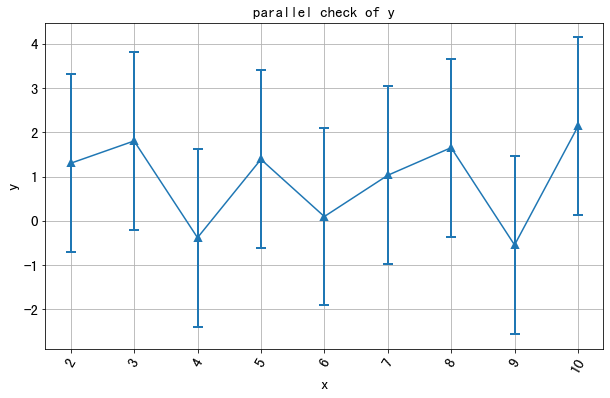

                  High Dimensional Fixed Effect Regression Results                  
  Dep. Variable:               y   R-squared(proj model):                   0.0307  
  No. Observations:         1000   Adj. R-squared(proj model):             -0.0904  
  DoF of residual:         888.0   R-squared(full model):                   0.0905  
  Residual std err:       5.8089   Adj. R-squared(full model):             -0.0242  
  Covariance Type:     nonrobust   F-statistic(proj model):                 9.3839  
  Cluster Method:     no_cluster   Prob (F-statistic (proj model)):      4.137e-06  
                                   DoF of F-test (proj model):        [3.0, 888.0]  
                                   F-statistic(full model):                 0.7879  
                                   Prob (F-statistic (full model)):         0.9443  
                                   DoF of F-test (full model):          [112, 888]  
                                  coef nonrobust std err         

In [13]:
formula = 'y ~ x_1|id+time|0|0'

model_did = did(data_df = df,
                formula = formula,
                treatment = ['treatment'],            
                exp_date=2)
result = model_did.fit()
result.summary()

In [14]:
formula = 'y ~ x_1+post*treatment|id+time|0|0'

model_fe1 = fixedeffect(data_df = df,
                formula = formula,
                treatment = ['treatment'],            
                exp_date=2)
result = model_fe1.fit()
result.summary()

dependent variable(s): ['y']
independent(exogenous): ['x_1', 'post*treatment']
category variables(fixed effects): ['id', 'time']
cluster variables: ['0']
                  High Dimensional Fixed Effect Regression Results                  
  Dep. Variable:               y   R-squared(proj model):                   0.0310  
  No. Observations:         1000   Adj. R-squared(proj model):             -0.0889  
  DoF of residual:         889.0   R-squared(full model):                   0.1944  
  Residual std err:       5.4640   Adj. R-squared(full model):              0.0938  
  Covariance Type:     nonrobust   F-statistic(proj model):                14.1989  
  Cluster Method:     no_cluster   Prob (F-statistic (proj model)):       8.51e-07  
                                   DoF of F-test (proj model):        [2.0, 889.0]  
                                   F-statistic(full model):                 1.9299  
                                   Prob (F-statistic (full model)):      2.118e-0

dependent variable(s): ['y']
independent(exogenous): ['x_1']
csid: id
tsid: time
category variables(fixed effects): ['id', 'time']
cluster variables: ['0']


/Users/zhouxiaoyu/Desktop/FixedEffectModel/fixedeffect/utils/GenCrossProd.py:57: UserWarning: You are doing DID with individual effect
  warnings.warn('You are doing DID with individual effect')


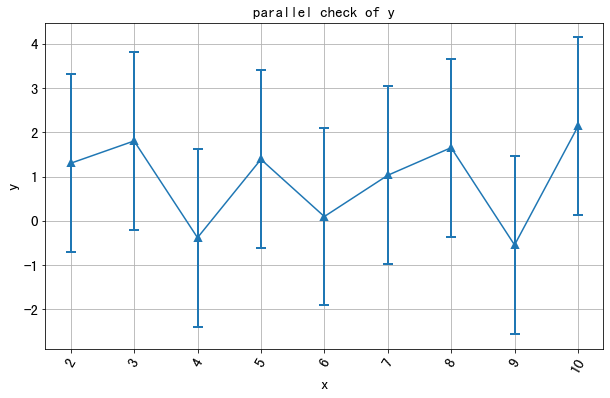

                  High Dimensional Fixed Effect Regression Results                  
  Dep. Variable:               y   R-squared(proj model):                   0.0310  
  No. Observations:         1000   Adj. R-squared(proj model):             -0.0889  
  DoF of residual:         889.0   R-squared(full model):                   0.1944  
  Residual std err:       5.4640   Adj. R-squared(full model):              0.0938  
  Covariance Type:     nonrobust   F-statistic(proj model):                14.1989  
  Cluster Method:     no_cluster   Prob (F-statistic (proj model)):       8.51e-07  
                                   DoF of F-test (proj model):        [2.0, 889.0]  
                                   F-statistic(full model):                 1.9299  
                                   Prob (F-statistic (full model)):      2.118e-07  
                                   DoF of F-test (full model):          [111, 889]  
                                  coef nonrobust std err         

In [15]:
formula = 'y ~ x_1|id+time|0|0'

model_did = did(data_df = df,
                formula = formula,
                treatment = ['treatment'], 
                group_effect='individual',
                exp_date=2)
result = model_did.fit()
result.summary()

dependent variable(s): ['y']
independent(exogenous): ['x_1*x_2']
csid: id
tsid: time
category variables(fixed effects): ['id', 'time']
cluster variables: ['0']


/Users/zhouxiaoyu/Desktop/FixedEffectModel/fixedeffect/utils/GenCrossProd.py:57: UserWarning: You are doing DID with individual effect
  warnings.warn('You are doing DID with individual effect')


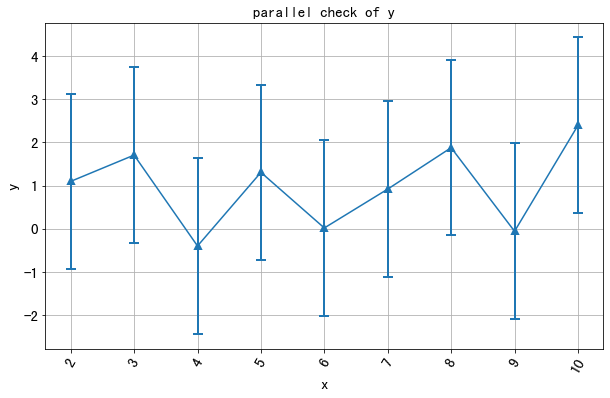

                  High Dimensional Fixed Effect Regression Results                  
  Dep. Variable:               y   R-squared(proj model):                   0.0011  
  No. Observations:         1000   Adj. R-squared(proj model):             -0.1225  
  DoF of residual:         889.0   R-squared(full model):                   0.1695  
  Residual std err:       5.5476   Adj. R-squared(full model):              0.0658  
  Covariance Type:     nonrobust   F-statistic(proj model):                 0.4794  
  Cluster Method:     no_cluster   Prob (F-statistic (proj model)):         0.6193  
                                   DoF of F-test (proj model):        [2.0, 889.0]  
                                   F-statistic(full model):                 1.6329  
                                   Prob (F-statistic (full model)):         0.0001  
                                   DoF of F-test (full model):          [111, 889]  
                                  coef nonrobust std err         

In [16]:
formula = 'y ~ x_1*x_2|id+time|0|0'

model_did = did(data_df = df,
                formula = formula,
                treatment = ['treatment'], 
                group_effect='individual',
                exp_date=2)
result = model_did.fit()
result.summary()

# fit_multi_model

In [17]:

from fixedeffect.multi_model import fit_multi_model

models = [model_iv2sls, model_fe, model_did]
fit_multi_model(models)

multi                                               
const                      -1.404   -2.669   -2.912 
std err                     0.1021   0.0037   0.3511
pvalue                     3.4e-39      0.0  4.0e-16
x_1                        -1.522   0.9838  Nan     
std err                     0.1203   0.2057 Nan     
pvalue                     6.9e-34  2.0e-06 Nan     
hat_x_2                     97.96  Nan      Nan     
std err                     2.2569 Nan      Nan     
pvalue                    8.2e-222 Nan      Nan     
x_1*x_2                   Nan      Nan       0.1264 
std err                   Nan      Nan        0.1861
pvalue                    Nan      Nan          0.50
treatment*post_experiment Nan      Nan       0.9878 
std err                   Nan      Nan        1.3507
pvalue                    Nan      Nan          0.46
----------------------------------------------------


/Users/zhouxiaoyu/Desktop/FixedEffectModel/fixedeffect/utils/ClusterErr.py:140: UserWarning: Negative eigenvalues set to zero in multi-way clustered variance matrix.
  warnings.warn('Negative eigenvalues set to zero in multi-way clustered variance matrix.')
